In [ ]:
#Start with importing useful libraries: 
#Numpy for numerical calculations and 
#Pandas for data manipulation and analysis
#Matplotlib for data visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [ ]:
#Task 1: Imoprt the data
df=pd.read_csv('/content/Comcast_telecom_complaints_data.csv')
#print(df)
#df.head(1)
#Ticket #: Ticket number assigned to each complaint
#Customer Complaint: Description of complaint
#Date: Date of complaint
#Time: Time of complaint
#Received Via: Mode of communication of the complaint
#City: Customer city
#State: Customer state
#Zipcode: Customer zip
#Status: Status of complaint
#Filing on behalf of someone

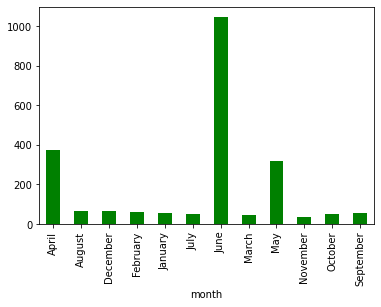

In [ ]:
#Task 2: A) make chart of # of complaints against month. B) chart for # of complaints per day
#To do so we need to use the to_datetime() function to convert the ‘Date’ column to a datetime object

#A -we also use the function groupby 

df['month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
monthly_data=df.groupby(['month'])['Customer Complaint'].count()
monthly_data.plot(kind='bar',color='green')


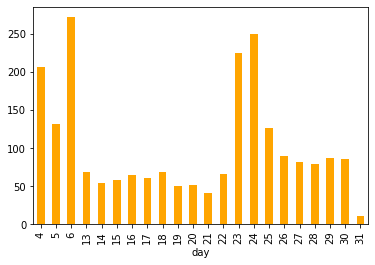

In [ ]:
df['day']=pd.to_datetime(df['Date_month_year']).dt.day
daily_data=df.groupby(['day'])['Customer Complaint'].count()
daily_data.plot(kind='bar',color='orange')

In [ ]:
#Table of frequency of compliants
complaints_freq=df['Customer Complaint'].value_counts()

In [ ]:
#put it into a nice table using to_frame()
complaints_freq.to_frame()


,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Data Caps,11
...,...
Bait and Switch again,1
Continued Calls from Comcast,1
FCC.gov website for complaints,1
Shady Internet Billing Practices from Comcast,1


In [ ]:
#Maximum comp. type
complaints_freq.head(1)

Comcast    83
Name: Customer Complaint, dtype: int64

In [ ]:
#Let the status "open" or "pending" be open, and let "solved" or "closed" be closed
#We use the functions apply to do this

df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')


In [ ]:
#making sure
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

Text(0.5, 1.0, 'state vs status count')

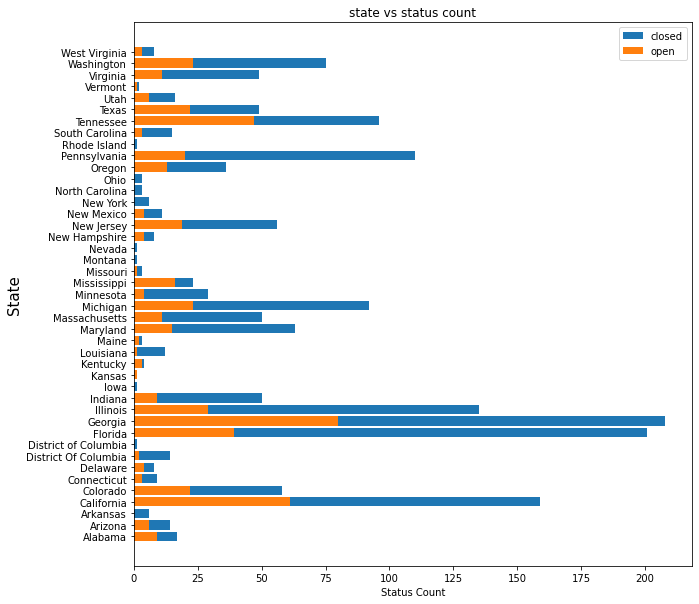

In [ ]:
#Stacked bar chart

open_cases=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
closed_cases=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

chart=plt.figure(figsize=(10,10))
plt.barh(closed_cases.State, closed_cases.Status)
plt.barh(open_cases.State, open_cases.Status)

plt.ylabel("State", size=15)
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("state vs status count")

In [ ]:
#Max complaints
complaints_per_state=df.groupby(['State'])['Customer Complaint'].count()
#complaints_per_state.max()
complaints_per_state

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [ ]:
#Gorgia has the maximum comnplaints.
'Gorgia'

'Gorgia'

In [ ]:
#Percentage of complaints resolved
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100


Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64